**Stock prediction using Support Vector Regression**

**Step 1:Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

**Step 2:Import Dataset**

In [2]:
dataset = pd.read_csv('Stock_Predicition.csv')
x= dataset.iloc[:, 1:-1].values
y= dataset.iloc[:, -1].values

In [3]:
dataset

,Date,Open,High,Low,Close,Volume,Adj Close
0,30-Mar-17,144.19,144.50,143.50,143.93,21207252,29.86
1,29-Mar-17,143.68,144.49,143.19,144.12,29189955,29.84
2,28-Mar-17,140.91,144.04,140.62,143.80,33374805,29.90
3,27-Mar-17,139.39,141.22,138.62,140.88,23575094,30.10
4,24-Mar-17,141.50,141.74,140.35,140.64,22395563,31.28
...,...,...,...,...,...,...,...
1779,5-Mar-10,30.71,31.39,30.66,31.28,224904603,140.64
1780,4-Mar-10,29.90,30.13,29.80,30.10,91509936,140.88
1781,3-Mar-10,29.85,29.98,29.71,29.90,93059694,143.80
1782,2-Mar-10,29.99,30.12,29.68,29.84,141636152,144.12


In [4]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,30-Mar-17,144.19,144.50,143.50,143.93,21207252,29.86
1,29-Mar-17,143.68,144.49,143.19,144.12,29189955,29.84
2,28-Mar-17,140.91,144.04,140.62,143.80,33374805,29.90
3,27-Mar-17,139.39,141.22,138.62,140.88,23575094,30.10
4,24-Mar-17,141.50,141.74,140.35,140.64,22395563,31.28


In [5]:
print(x)

[[1.44190000e+02 1.44500000e+02 1.43500000e+02 1.43930000e+02
  2.12072520e+07]
 [1.43680000e+02 1.44490000e+02 1.43190000e+02 1.44120000e+02
  2.91899550e+07]
 [1.40910000e+02 1.44040000e+02 1.40620000e+02 1.43800000e+02
  3.33748050e+07]
 ...
 [2.98500000e+01 2.99800000e+01 2.97100000e+01 2.99000000e+01
  9.30596940e+07]
 [2.99900000e+01 3.01200000e+01 2.96800000e+01 2.98400000e+01
  1.41636152e+08]
 [2.93900000e+01 2.99300000e+01 2.93500000e+01 2.98600000e+01
  1.37523183e+08]]


In [6]:
print(y)

[ 29.86  29.84  29.9  ... 143.8  144.12 143.93]


**Step 3:Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x=sc_x.fit_transform(x)

sc_y= StandardScaler()
y= sc_y.fit_transform(y.reshape(-1, 1)) 

In [8]:
print(x)

[[ 2.15686185  2.12693231  2.17451249  2.14701754 -1.17370378]
 [ 2.13909089  2.12658637  2.16363852  2.15363478 -1.03809982]
 [ 2.04257016  2.11101882  2.07348986  2.14248995 -0.96701084]
 ...
 [-1.82731853 -1.83483527 -1.81693361 -1.82437487  0.04686967]
 [-1.82244022 -1.82999203 -1.81798593 -1.82646452  0.87204879]
 [-1.84334724 -1.83656499 -1.82956144 -1.82576797  0.80218087]]


In [9]:
print(y)

[[-1.82576797]
 [-1.82646452]
 [-1.82437487]
 ...
 [ 2.14248995]
 [ 2.15363478]
 [ 2.14701754]]


**Step 4: Split the dataset into training and testing sets**

In [10]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Step 5:Training the SVR Model on the whole dataset**

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**Step 5:Predicting a new Result**

In [12]:
y_pred=regressor.predict(x_test)

y_pred_inverse = sc_y.inverse_transform(y.reshape(-1, 1))


In [13]:
y.shape

(1784, 1)

**Step 6:Visualising the SVR Result**

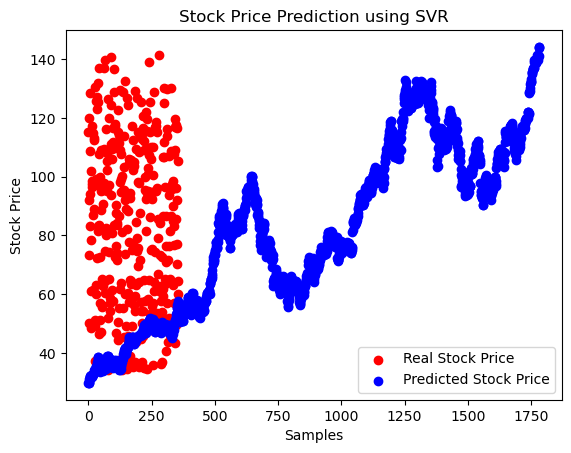

In [14]:
plt.scatter(range(len(y_test)), sc_y.inverse_transform(y_test.reshape(-1, 1)), color='red', label='Real Stock Price')
plt.scatter(range(len(y_pred_inverse)), y_pred_inverse, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction using SVR')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.legend()